<a href="https://colab.research.google.com/github/rishig77/rishig77/blob/main/DNN%2BCNN_in_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from sklearn import preprocessing
from operator import itemgetter
from sklearn.metrics import mean_squared_error
import keras
import seaborn as sns
sns.set()

**Read data and transform them to pandas dataframe**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ashishpatel26/NYSE-STOCK_MARKET-ANALYSIS-USING-LSTM/master/nyse/prices-split-adjusted.csv", index_col = 0)
df["adj close"] = df.close # Moving close to the last column
df.drop(['close'], axis='columns', inplace=True) # Moving close to the last column.   , inplace=True
df.head()

,symbol,open,low,high,volume,adj close
date,,,,,,
2016-01-05,WLTW,123.430000,122.309998,126.250000,2163600.0,125.839996
2016-01-06,WLTW,125.239998,119.940002,125.540001,2386400.0,119.980003
2016-01-07,WLTW,116.379997,114.930000,119.739998,2489500.0,114.949997
2016-01-08,WLTW,115.480003,113.500000,117.440002,2006300.0,116.620003
2016-01-11,WLTW,117.010002,114.089996,117.330002,1408600.0,114.970001


In [ ]:
df2 = pd.read_csv("https://raw.githubusercontent.com/ashishpatel26/NYSE-STOCK_MARKET-ANALYSIS-USING-LSTM/master/nyse/fundamentals.csv")
df2.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


**Extract all symbols from the list**

In [ ]:
symbols = list(set(df.symbol))
len(symbols)

501

In [ ]:
symbols[:11]

['A', 'ZION', 'QCOM', 'TXN', 'PSX', 'EIX', 'MCD', 'TGT', 'LEN', 'HPE', 'WRK']

In [ ]:
df = df[df.symbol == 'GOOG']
df.drop(['symbol'],axis='columns',inplace=True)
df.head()

,open,low,high,volume,adj close
date,,,,,
2010-01-04,312.304948,310.955001,313.580158,3927000.0,312.205308
2010-01-05,312.419511,309.610028,312.748278,6031900.0,310.830459
2010-01-06,311.761979,302.048370,311.761979,7987100.0,302.994813
2010-01-07,303.562685,295.218951,303.861575,12876600.0,295.941242
2010-01-08,294.895159,293.455551,300.499172,9483900.0,299.886470


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       1762 non-null   float64
 1   low        1762 non-null   float64
 2   high       1762 non-null   float64
 3   volume     1762 non-null   float64
 4   adj close  1762 non-null   float64
dtypes: float64(5)
memory usage: 82.6+ KB


<ipython-input-18-ffc8e87df837>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(411)


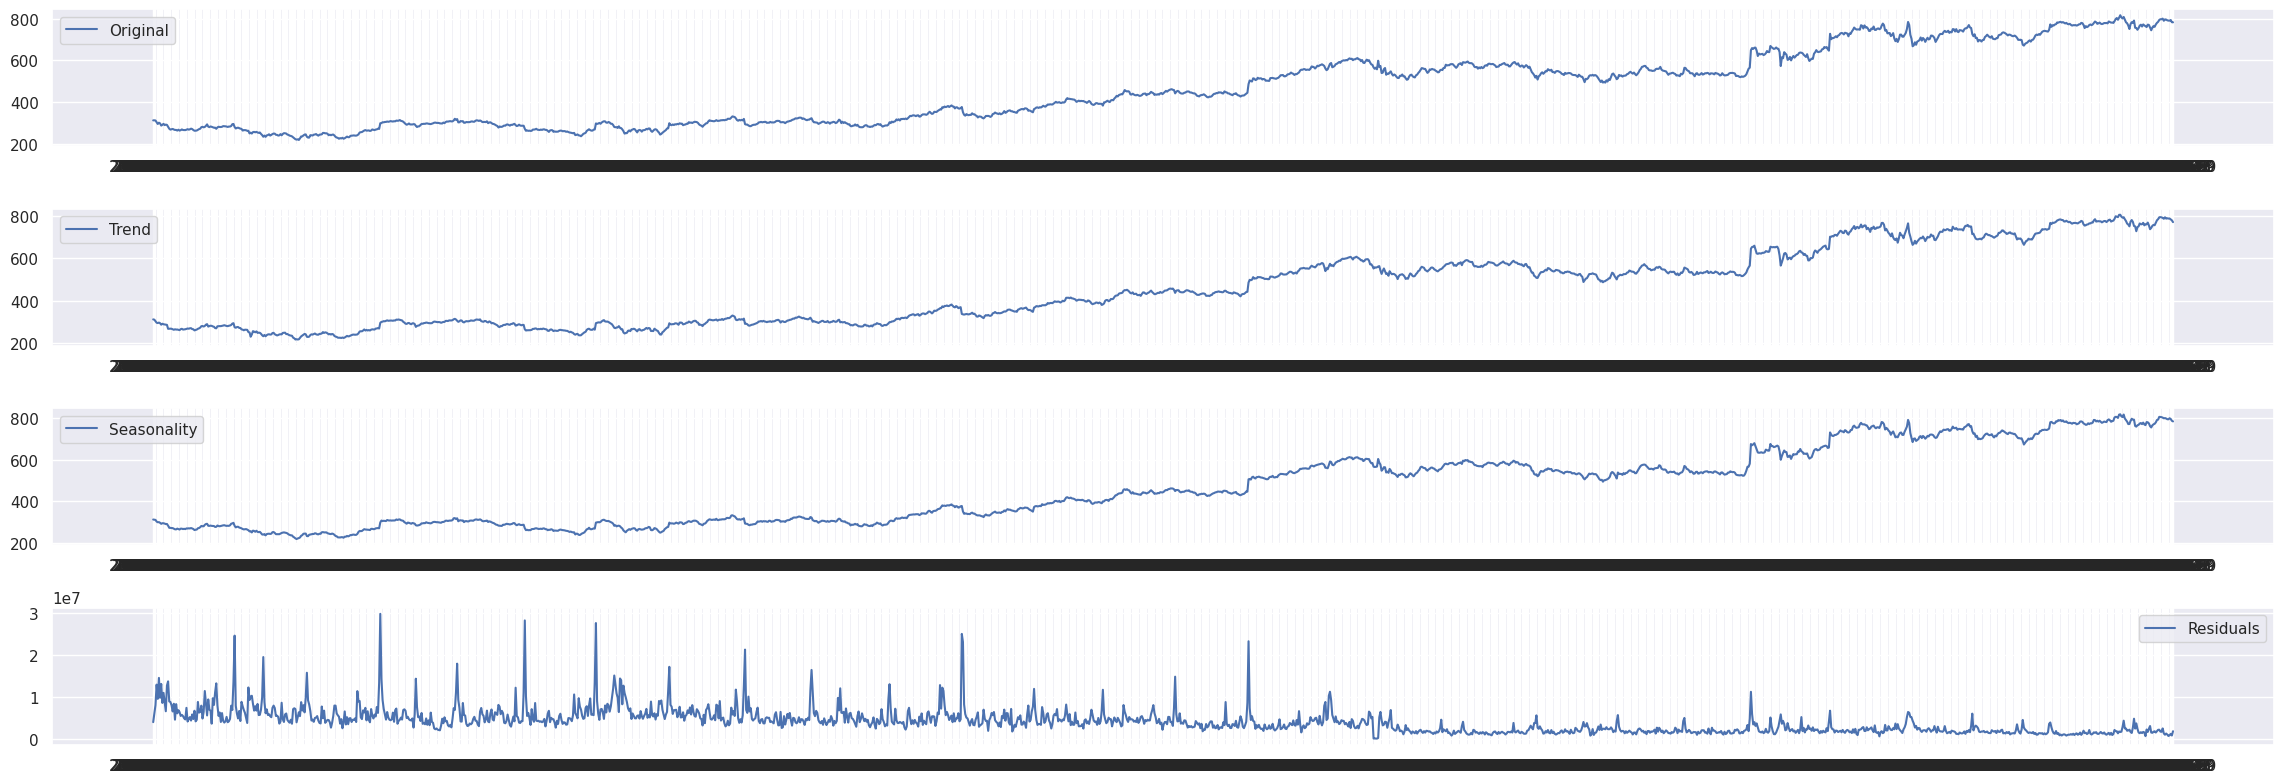

In [ ]:
df.plot(figsize=(23,8),title = "Google Stock Price Analysis")
plt.subplot(411)
plt.plot(df.open, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(df.low, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(df.high,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(df.volume, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**Normalize the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


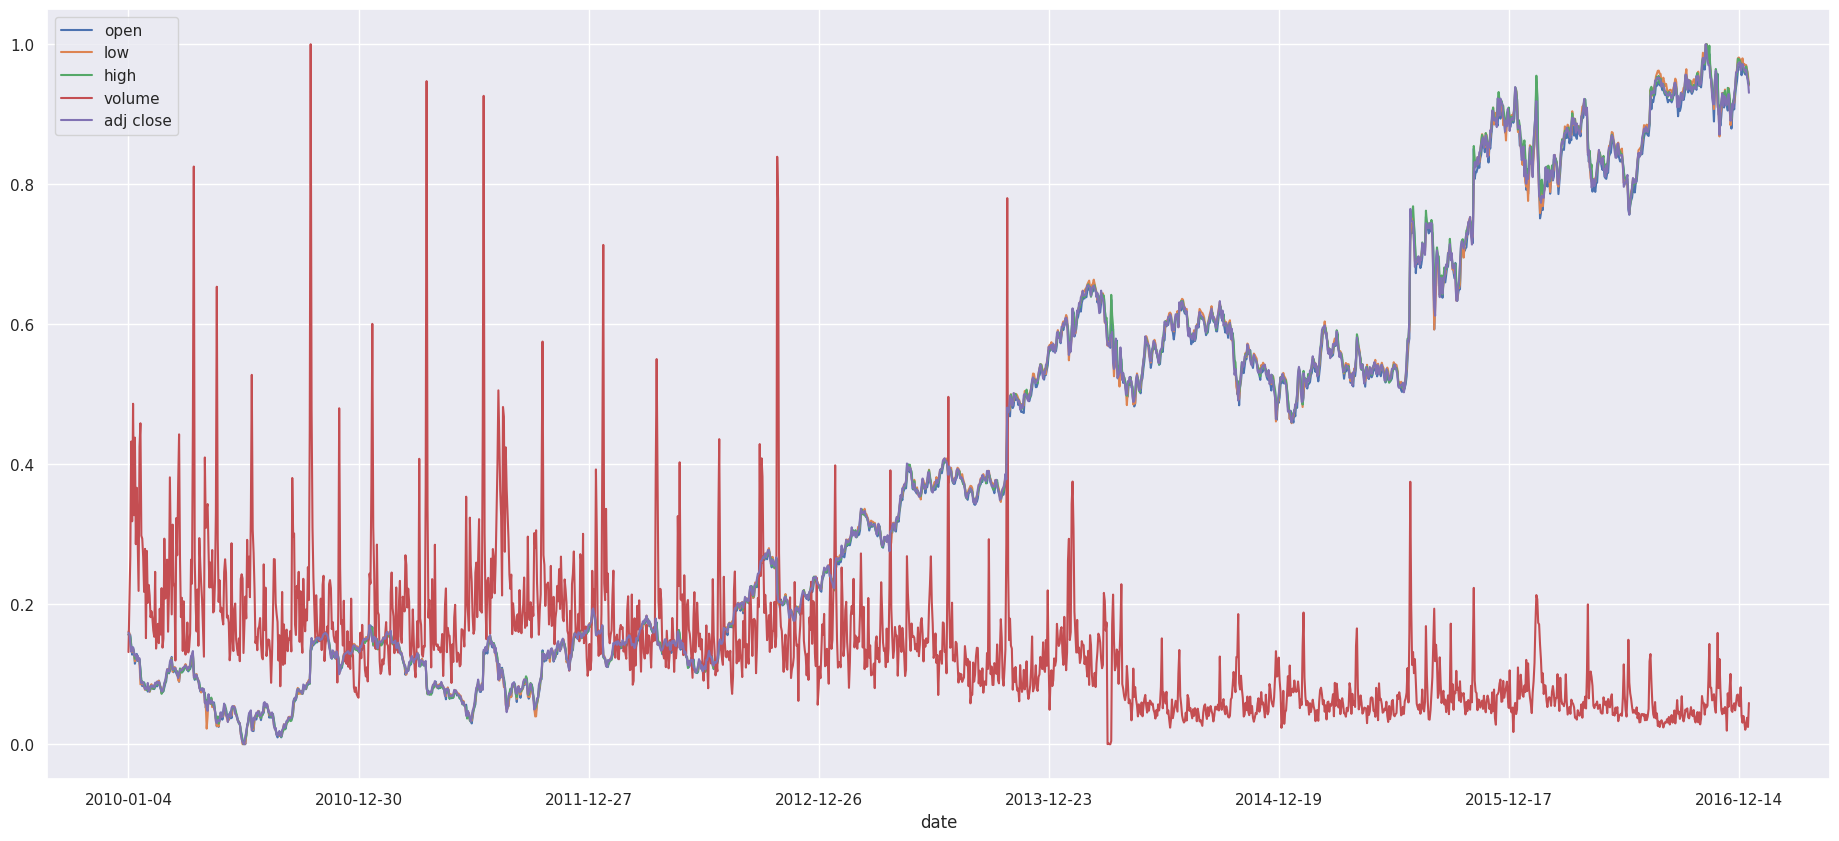

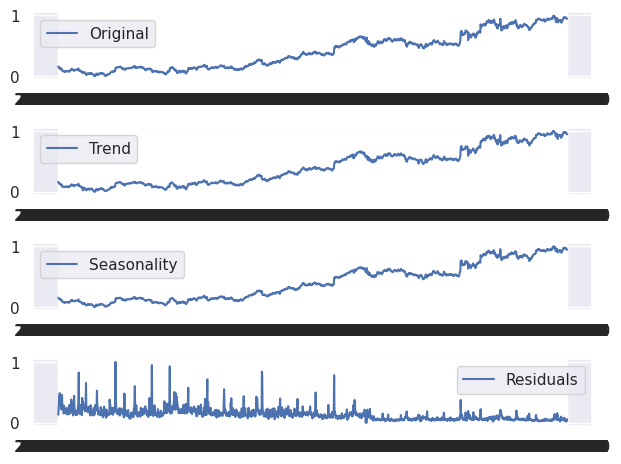

In [ ]:
def normalize_data(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['volume'] = min_max_scaler.fit_transform(df.volume.values.reshape(-1,1))
    df['adj close'] = min_max_scaler.fit_transform(df['adj close'].values.reshape(-1,1))
    return df
df = normalize_data(df)
df.plot(figsize=(23,10))
plt.show()
plt.subplot(411)
plt.plot(df.open, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(df.low, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(df.high,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(df.volume, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**Create Training Set and Testing Set**

In [ ]:
del df['volume']
def load_data(stock, window):
    data = stock.to_numpy()
    result = []

    for index in range(len(data) - window): # maxmimum date = lastest date - sequence length
        result.append(data[index: index + window]) # index : index + n days

    result = np.array(result).reshape(4*window, -1)
    row = round(0.9 * result.shape[1]) # 90% split

    x_train = result[:, :int(row)]
    y_train = data[window:window+int(row),3].reshape(-1, 1)

    x_test = result[:, int(row):]
    y_test = data[window+int(row):,3].reshape(-1, 1)

    return [x_train, y_train, x_test, y_test]

In [ ]:
x_train, y_train, x_test, y_test = load_data(df.iloc[:1760,:], 10)

In [ ]:
x_train.shape
y_train.shape

(1575, 1)

## **Build the structure of model**  

* **epochs** = 10000  
* **DNN** 256  

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(40,)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             410 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='mse',
              optimizer = optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train.T, y_train, batch_size=x_train.size, epochs=10000, validation_data=(x_test.T, y_test))

Streaming output truncated to the last 5000 lines.
Epoch 7501/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 6.3492e-04 - loss: 0.0082 - val_accuracy: 0.0057 - val_loss: 0.0478
Epoch 7502/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 6.3492e-04 - loss: 0.0082 - val_accuracy: 0.0057 - val_loss: 0.0478
Epoch 7503/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 6.3492e-04 - loss: 0.0082 - val_accuracy: 0.0057 - val_loss: 0.0478
Epoch 7504/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 6.3492e-04 - loss: 0.0082 - val_accuracy: 0.0057 - val_loss: 0.0478
Epoch 7505/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 6.3492e-04 - loss: 0.0082 - val_accuracy: 0.0057 - val_loss: 0.0478
Epoch 7506/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 6.3492e-04 - loss: 0.0082 - val_accuracy: 0.0057 - val_loss: 0.0477
Epoch 7507/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 6.3492e-04 - loss: 0.0082 - val_accuracy: 0.0057 - val_loss: 0.0477


## Build the Convolution Neural Network

epochs = 200

In this part we will build a Convolution Neural Network(CNN). CNNs are usually used for visual images and categorizations, however it could be used in the regression cases like this. In order to use the CNN, we need to change the shape of our input and output values, and then redo the train-test split.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
stock = df.iloc[:1760,:]
window = 10

data = stock.to_numpy()
result = []

for index in range(len(data) - window): # maxmimum date = lastest date - sequence length
    result.append(data[index: index + window]) # index : index + n days

result = np.array(result).reshape(4*window, -1)

x = result.T
y = data[window:,3]

print(x.shape)
print(y.shape)

(1750, 40)
(1750,)


Here we can see that our feature data is at shape (1750, 40), which is a two dimensional. It represents 1750 observations and 40 variables. To make regression predictions in CNN, we need to use the Conv 1d model in Keras. Thus we need to make the input one dimentional. To do that, we can add a dimention and treat the whole data as a single input row.

In [ ]:
x = x.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)

(1750, 40, 1)


Then, we can test-train split the data again, using the 90% cut-off.

In [ ]:
x_train_cnn, x_test_cnn, y_train_cnn, y_test_cnn=train_test_split(x, y, test_size=0.1)
print(x_train_cnn.shape)
print(x_test_cnn.shape)
print(y_train_cnn.shape)
print(y_test_cnn.shape)

(1575, 40, 1)
(175, 40, 1)
(1575,)
(175,)


Now with the new data shape, we can create the 1-d convolution model and fit the train data.

- First we add a Conv1D layer, the input shape is (40, 1) because we have reshaped the data to be a single input row. It uses ReLU as activation function.
- Then we use a flatten layer to flatten the data for further calculation
- Then we add a dense layer with ReLU.
- Finally we compile the model and calculate the loss with ADAM optimizer.


In [ ]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(40, 1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.summary()

model.compile(loss="mse", optimizer="adam")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 39, 32)              │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1248)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          79,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,097 (312.88 KB)

 Trainable params: 80,097 (312.88 KB)

 Non-trainable params: 0 (0.00 B)

After creating the model, we can fit and predict it with our trainning data.

In [ ]:
hist = model.fit(x_train_cnn, y_train_cnn, batch_size=12,epochs=200, validation_data=(x_test_cnn, y_test_cnn))

Epoch 1/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0725 - val_loss: 0.0083
Epoch 2/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0078 - val_loss: 0.0094
Epoch 3/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0074 - val_loss: 0.0081
Epoch 4/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 5/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0056 - val_loss: 0.0069
Epoch 6/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0052 - val_loss: 0.0051
Epoch 7/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0050 - val_loss: 0.0044
Epoch 8/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 9/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0051 - val_loss: 0.0039
Epoch 10/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0042 - val_loss: 0.0045
Epoch 11/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0045 - val_loss: 0.0037
Epoch 12/200
132/132 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
y_pred_cnn = model.predict(x_test_cnn)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022
0.002130972919985652
MSE: 0.0026


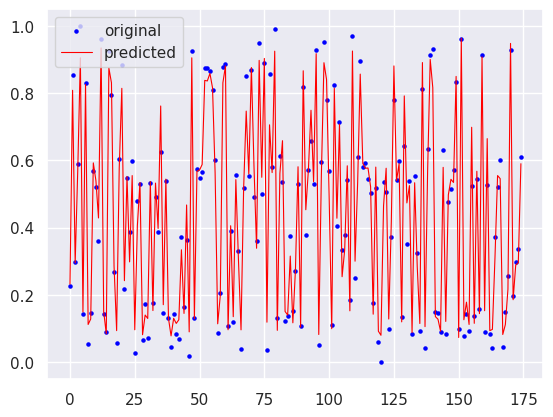

In [ ]:
print(model.evaluate(x_train_cnn, y_train_cnn))

print("MSE: %.4f" % mean_squared_error(y_test_cnn, y_pred_cnn))

x_ax = range(len(y_pred_cnn))
plt.scatter(x_ax, y_test_cnn, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred_cnn, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

The result from CNN model is very good, with a MSE of 0.3%. The plot of original VS predicted is at above.